**TF-IDF BASED COSINE SIMILARITY**

In [0]:
import nltk
import pandas as pd
from sklearn.metrics import confusion_matrix
import string 
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
ps=PorterStemmer()
from collections import defaultdict
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import math
import matplotlib.pyplot as plt
ps=PorterStemmer()

Reading the train-test data

In [0]:
traindata = pd.read_csv('/content/drive/My Drive/train.csv')
testdata = pd.read_csv('/content/drive/My Drive/test.csv')
real = defaultdict(list)
not_real = defaultdict(list)

Function to calculate dot product

In [0]:
def dot(K,L):
        if len(K)==len(L) and len(K)!=0:
            return sum([K[n]*L[n] for n in range(len(K))])
        else:
            return 0

In [0]:
print('Training Set Shape = {}'.format(traindata.shape))

print('Test Set Shape = {}'.format(testdata.shape))

Training Set Shape = (7613, 5)
Test Set Shape = (3263, 4)


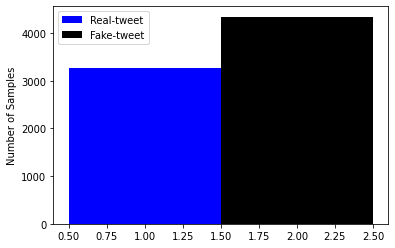

In [0]:
Realdata = traindata[traindata['target'] == 1].shape[0]
fakedata = traindata[traindata['target'] == 0].shape[0]
plt.bar(1,Realdata,1, label="Real-tweet", color='blue')
plt.bar(2,fakedata,1, label="Fake-tweet", color='black')
plt.legend()
plt.ylabel('Number of Samples')
plt.show()

Calculating tf-idf for cosine similarity

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
for i in range(5000):
    tokens = nltk.word_tokenize(traindata['text'][i])
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    lmt = [wordnet_lemmatizer.lemmatize(word) for word in words]
    lm = [ps.stem(word) for word in lmt]
    for l in lm:
        if(traindata['target'][i] == 1):
            value = real.get(l,"Empty")
            if(value == "Empty"):
                real[l].append(1)
            else:
                v = value[0]+1
                real[l].pop()
                real[l].append(v)
        else:
            value = not_real.get(l,"Empty")
            if(value == "Empty"):
                not_real[l].append(1)
            else:
                v = value[0]+1
                not_real[l].pop()
                not_real[l].append(v)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Calculating cosine similarity forr test data and assigning label according to similarity

In [0]:
calc_target=[]
actual_target=[]
for i in range(5001,len(traindata['target'])):
   
    text_vector=[]
    real_vector=[]
    not_real_vector=[]
    done = []
    r_v=0
    n_v=0
    t_v=0
    tokens = nltk.word_tokenize(traindata['text'][i])
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    lmt = [wordnet_lemmatizer.lemmatize(word) for word in words]
    lm = [ps.stem(word) for word in lmt]
    for j in lm:
        if j not in done:
            temp = 1+math.log10(lm.count(j))
            t_v=t_v+(temp**2)
            text_vector.append(temp)
            done.append(j)
            value = real.get(j,"Empty")
            if value == "Empty":
                real_vector.append(0)
            else:
                v = value[0]
                v = 1+math.log10(v)
                r_v = r_v+(v**2)
                real_vector.append(v)
            value1 = not_real.get(j,"Empty")
            if(value1 == "Empty"):
                not_real_vector.append(0)
            else:
                v1= value1[0]
                v1 = 1+math.log10(v1)
                n_v = n_v+(v1**2)
                not_real_vector.append(v1)
   # print(n_v,"...........",r_v,"..........",t_v)
    if n_v == 0 and r_v==0:
        continue
    else:
        actual_target.append(traindata['target'][i])
        if n_v ==0:
            calc_target.append(1)
        elif r_v ==0:
            calc_target.append(0)
        else:
            n_v = math.sqrt(n_v)
            r_v = math.sqrt(r_v)
            t_v = math.sqrt(t_v)
            d = dot(real_vector,text_vector)
            sim_real = d/(r_v*t_v)
            d1 = dot(not_real_vector,text_vector)
            sim_not_real = d1/(n_v*t_v)
            if(sim_real>sim_not_real):
                calc_target.append(1)
            else:
                calc_target.append(0)

In [0]:
print("Accuracy of TF-IDF model is : ",accuracy_score(actual_target,calc_target))
print(confusion_matrix(actual_target,calc_target))

Accuracy of TF-IDF model is :  0.6990403071017275
[[967 463]
 [321 854]]
